In [ ]:
#raw data
#explanation
#b=1000 number of minibatches
#k=10 number of clusters
#t=number of iterations (always 16)
kmeans_571157_b1000_k10_t16_34
10.960398718714714,0.1654425217928855
kmeans_571479_b1000_k10_t16_33
13.89051952958107,0.5125495202836564
kmeans_571755_b1000_k10_t16_32
20.07382282614708,0.4802698929270084
kmeans_572108_b1000_k10_t16_31
38.9780380576849,0.7363625676820877
kmeans_580593_b1000_k10_t16_12
23.747789606451988,0.5388051476969464
kmeans_635749_b1000_k10_t16_11
45.7676297724247,0.668774765587137
kmeans_636529_b1000_k10_t16_13
16.180573046207428,0.4015710503748383
kmeans_636879_b1000_k10_t16_14
12.569230452179909,0.39948252728457334
kmeans_637532_b1000_k10_t16_21
24.28873172402382,0.48706860016254955
kmeans_637936_b1000_k10_t16_22
12.283212691545486,0.24151337632651965
kmeans_638549_b1000_k10_t16_23
8.8641247600317,0.43920004737982327
kmeans_638908_b1000_k10_t16_24
6.913647651672363,0.34475287626927625     

In [ ]:
#only workers with 1 core GPU
#12 workers
#increase in partitions size 
kmeans_642463_b1000_k10_t16_121 #12partitions
11.5060715675354,1.060556280853336
kmeans_643865_b1000_k10_t16_121_4x #48partitions
7.1263550370931625,0.09747773926907967
kmeans_644021_b1000_k10_t16_121_5x #60partitions
7.002316877245903,0.11866462091431716

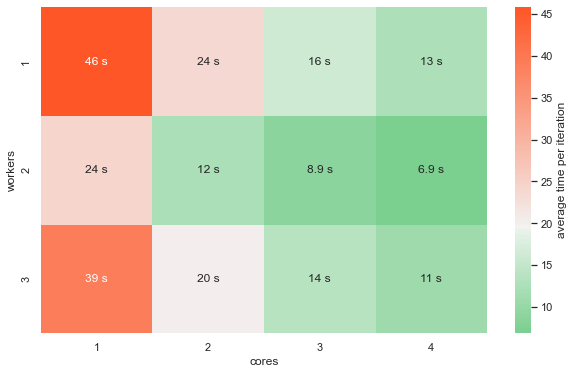

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat

workers = [1]*4 + [2]*4 + [3]*4 
cores = [1,2,3,4]*3
time = [45.7676297724247,
        23.747789606451988,
        16.180573046207428,
        12.569230452179909,
        24.28873172402382,
        12.283212691545486,
        8.8641247600317,
        6.913647651672363,
        38.9780380576849,
        20.07382282614708,
        13.89051952958107,
        10.960398718714714]

#sns.set(rc = {'figure.figsize':(10,6)})
data = pd.DataFrame({'workers': workers, 'cores': cores, 'time': time})
data_pivoted = data.pivot("workers", "cores", "time")
cmap = sns.diverging_palette(130, 18, s=100, l=60, n=10, as_cmap=True)
ax = sns.heatmap(data_pivoted, cmap=cmap, center=stat.mean(time), annot=True,cbar_kws={'label': 'average time per iteration'})
for t in ax.texts: t.set_text(t.get_text() + " s")

plt.show()


In [ ]:
#for Lorenzo efficiency
efficiency = []
for i in range(9):
    x.append()
for n in len(works)
efficiency[n] = time[n] / cores[n]

#mask inefficient settings
corr = np.corrcoef(np.random.randn(10, 200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

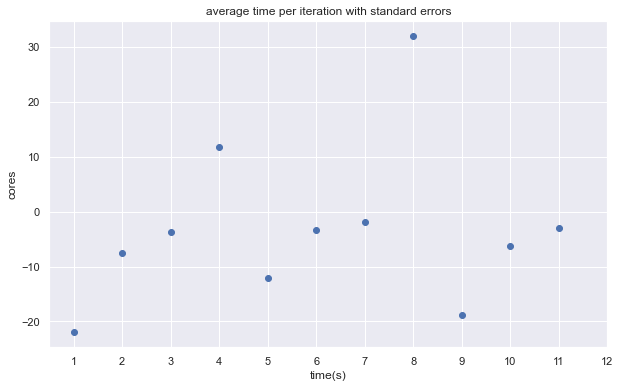

In [82]:
improve = [time[i+1]-time[i] for i in range(0,11)]

#improvements over time 
add_cores = list(np.arange(1,12))

plt.scatter(add_cores, improve)
plt.xticks(usage_cores)
plt.title("average time per iteration with standard errors")
plt.xlabel("time(s)")
plt.ylabel("cores")
plt.show()

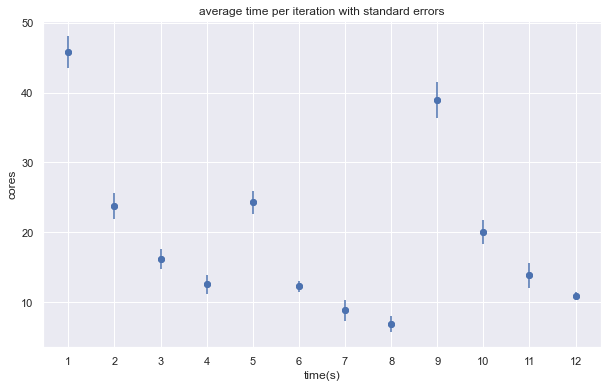

In [100]:
from math import sqrt


usage_cores = list(np.arange(1,12+1))
std=[0.668774765587137,
     0.5388051476969464,
     0.4015710503748383,
     0.39948252728457334,
     0.48706860016254955,
     0.24151337632651965,
     0.43920004737982327,
     0.34475287626927625,
     0.7363625676820877,
     0.4802698929270084,
     0.5125495202836564,
     0.1654425217928855]
ste = [i * sqrt(len(std)) for i in std]

plt.scatter(usage_cores, time)

plt.errorbar(usage_cores, time, yerr=ste, fmt="o")
plt.xticks(usage_cores)
plt.title("average time per iteration with standard errors")
plt.xlabel("time(s)")
plt.ylabel("cores")


#model5 = np.poly1d(np.polyfit(usage_cores, time, 8))
#polyline = np.linspace(1, 12, 50)
#plt.plot(polyline, model5(polyline), color='orange')


plt.show()
#time decrease id we increase cores per workers
#maximum cap is four cores per workers
#the average time decrease but every 4cores(1worker)
#weird: algorithm does not perform well with the addition of the third worker
#(vm of the third worker is two (almost three) time slower than the other ones)

###INSERT IMAGE vm_stats

In [ ]:
#INSERT IMAGES 12partitions & 24partitions
#some definitions:
#partitions are data chunk and each minibatch  is divided into partitions
#if we increase the size of minibatch we increase size of partition and get worst time scores because of the slower worker

#if number of partition is increased then overall time of the algorithm decrease (performance improved)
#why? the slower workers will deals with less data

Text(0, 0.5, 'partitions')

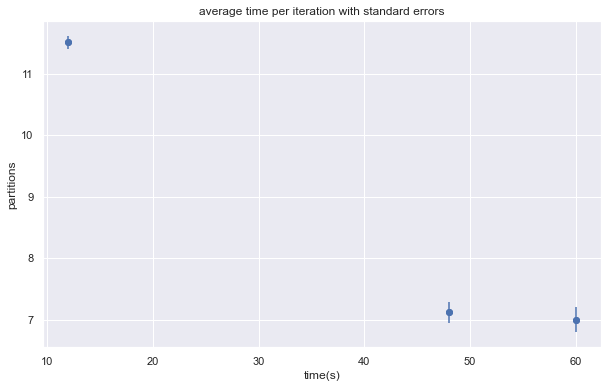

In [106]:
#analise performances of 12 workers with 1 core each
time_12 =  [11.5060715675354,
            7.1263550370931625,
            7.002316877245903]
std_12 = [0.060556280853336,
          0.09747773926907967,
          0.11866462091431716]
ste_12 = [i * sqrt(len(std_12)) for i in std_12]
partitions = [12,
              48,
              60]

plt.scatter(partitions, time_12)

plt.errorbar(partitions, time_12, yerr=ste_12, fmt="o")
plt.title("average time per iteration with standard errors")
plt.xlabel("time(s)")
plt.ylabel("partitions")
